In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import panel as pn
import glob

In [4]:
allnames = glob.glob('*194*infoshift*')

In [3]:
features_df = pd.io.parsers.read_csv('/home/bill/next100genes/all_features_with_locations.csv')

In [4]:
allnames

['fdhEarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'yehSarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'xylFarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'ygeRmetaldataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'dinJmetaldataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'yedJxanth2dataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'ybjLmetaldataset_alldone_with_largeMCMC195_infoshift_no_weight_smoothed.txt',
 'fdoHxanth2dataset_alldone_with_largeMCMC195_infoshift_no_weight_smoothed.txt',
 'rcsFLBdataset_alldone_with_largeMCMC195_infoshift_no_weight_smoothed.txt',
 'holCheatdataset_alldone_with_largeMCMC195_infoshift_no_weight_smoothed.txt',
 'yecELBdataset_alldone_with_largeMCMC195_infoshift_no_weight_smoothed.txt',
 'yfhGheatdataset_alldone_with_largeMCMC195_infoshift_no_weight_smoothed.txt',
 'yqhCSSdataset_alldone_with_large

In [6]:
possible_growths = ['metal','LB','xylara','xanth','SS','arabinose','heat']
growths = []
thegenes = []
#output_dict
for name in allnames:
    for x in possible_growths:
        if x in name:
            growths.append(x)
            thegenes.append(name.split(x)[0])
            #infodf = pd.io.parsers.read_csv(name,delim_whitespace=True)
            #infoarr = np.array(df.loc[:,'info'])
growthsarr = np.array(growths)
allnamesarr = np.array(allnames)
geneset = set(thegenes)
outdict = {}
for gene in geneset:
    indexes = np.nonzero(np.array(thegenes) == gene)[0]
    genegrowths = growthsarr[indexes]
    genenames = allnamesarr[indexes]
    tempdict = {}
    for i,name in enumerate(genenames):
        infodf = pd.io.parsers.read_csv(name,delim_whitespace=True)
        infoarr = np.array(infodf.loc[:,'info'])
        tempdict[genegrowths[i]] = infoarr
    outdict[gene] = tempdict    

In [8]:
geneset = list(set(thegenes))


In [ ]:
callback_gene = CustomJS(args=dict(source=source,allsource=alldatasource,growth=select_growth), code="""
    var data = source.data;
    var f = cb_obj.value
    var x = data['x']
    var alldata = allsource.data;
    var growth_column = select_growth.value
    var new_column = f.concat(" ",growth_column)
    for (var i = 0; i < data['top'].length; i++) {
        source.data['top'][i] = alldata[new_column][i]
    }
    source.change.emit();
""")

In [10]:
genedf = pd.DataFrame(geneset)

In [13]:
genedf

,0
0,groSL
1,ompR
2,ygjP
3,cra
4,hslU
5,fdoH
6,yedJ
7,ybjT
8,iap
9,WaaA-coaD


In [12]:
genedf.to_csv('all_genes.csv')

In [6]:
features_list = pd.io.parsers.read_csv('/home/bill/next100genes/all_features_with_locations.csv')

In [9]:
select_gene = pn.widgets.Select(name='Select gene', options=list(outdict.keys()))
select_growth = pn.widgets.Select(name='Select growth', options=list(outdict[select_gene.value].keys()))
#get number of TFs for the gene
goodrows = features_list['gene'] == select_gene.value
number_features = goodrows.sum()
TF_locations = features_list.loc[goodrows]

def stitch_starts_ends(s):
    return s['start'] + ' to ' + s['end'] 

#location_strings = TF_locations.apply(stitch_starts_ends,axis=0)

#right now we just have selection by number, soon we will put identities
#select_TF = pn.widgets.Select(name='Transcription factor location',options = list(location_strings))

#we will make a map from the keys to start and end locations
TF_lengths = []
for i,row in TF_locations.iterrows():
    TF_lengths.append(int(row['end'])-int(row['start']))

In [10]:

def plot_infoshift(gene='aphA',growth='arabinose'):
    plt.clf()
    plt.cla()
    s = outdict[gene][growth]
    
    colorinputs = np.zeros((160))
    for i in range(160):
        if s[i] < 0:
            colorinputs[i] = 0.0
        else:
            colorinputs[i] = 1.0
    fig,ax = plt.subplots(figsize=(10,2))
    shiftcolors = plt.cm.bwr(colorinputs)
    s_abs = np.abs(s)
    ax.bar(range(160),np.abs(s),color=shiftcolors)
    #fig = plt.bar(range(160),np.abs(s),color=shiftcolors)
    plt.close(fig)
    return fig
#def intermediate_plot(select_gene='aphA',select_growth='arabinose',view_fn=plot_infoshift)
#    return view_fn(select_gene=select_gene,select_growth=select_growth)

def write_text(TF='aphA'):
    if TF is not None:
        text = pn.panel("                The Transcription Factor binding site starts at position" + gene) 
        return text
    else:
        return text = pn.panel('') 

def plot_TFs(gene='aphA'):
    TFs_to_do = features_df.loc[features_df['gene'] == gene,:]
    
    features_list = []
    if len(TFs_to_do.index) > 0:
        TFs_to_do = TFs_to_do.reset_index()
        TFS_to_do = TFs_to_do.loc[0,:]
        for i,row in TFs_to_do.iterrows():
            text_TF = pn.panel('                 TF Binding Site extends from ' + str(row['start']) + 
                                          ' to ' + str(row['end']))
        return text_TF
    else:
        return None
    

def plot_TFs(gene='aphA',growth='arabinose',location='0 to 0'):
    logo_start = location.split(' ')[0]
    logo_end = location.split(' ')[-1]
    in_file_name = gene + growth + 'dataset_alldone_with_largeMCMC194'
    modin = pd.io.parsers.read_csv(in_file_name,delim_whitespace=True)
    modinarr = np.array(modin.loc[int(logo_start):int(logo_end)-1,['val_A','val_C','val_G','val_T']])
    plt.clf()
    plt.cla()
    fig,ax = plt.subplots(figsize=(10,2))
    plt.imshow(modinarr.T,interpolation='nearest',aspect='auto')
    plt.close(fig)
    return fig

In [12]:
def plot_TFs(gene='aphA',growth='arabinose',location=0):
    goodrows = features_list['gene'] == select_gene.value
    number_features = goodrows.sum()
    TF_locations = features_list.loc[goodrows]
    #reset_indices to iterate properly
    TF_locations.reset_index(inplace=True)
    num_TFs = len(TF_locations.index)
    plt.clf()
    plt.cla()
    #TF_lengths = []
    #for i,row in TF_locations.iterrows():
    TF_end = int(TF_locations.loc[location,'end'])
    TF_start = int(TF_locations.loc[location,'start'])
    TF_length = TF_end - TF_start 
    #fig,ax = plt.subplots(num_TFs,gridspec_kw={'width_ratios': TF_lengths})
    fig,ax = plt.subplots(figsize=(TF_length*.2,1.5))
    in_file_name = gene + growth + 'dataset_alldone_with_largeMCMC194'
    modin = pd.io.parsers.read_csv(in_file_name,delim_whitespace=True)
    modinarr = np.array(modin.loc[TF_start:TF_end-1,['val_A','val_C','val_G','val_T']])
    ax.imshow(modinarr.T,interpolation='nearest',aspect='auto',cmap='coolwarm')
    plt.close(fig)
    return fig

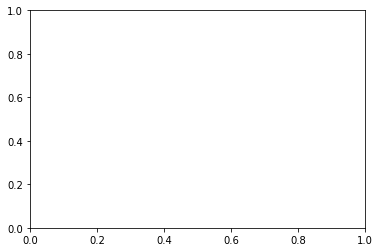

In [13]:
m = pn.interact(plot_infoshift,gene=select_gene,growth=select_growth)

m3 = pn.interact(plot_TFs,gene=select_gene,growth=select_growth,location=0)

m3 = pn.interact(plot_TFs,gene=select_gene,growth=select_growth,location=select_TF)

In [68]:
#for i in range(len(TF_lengths)):
#    outpanel = m
#    outpanel.add()

Column
    [0] Column
        [0] Select(options=['ftsK', 'znuA', ...], value='maoP')
        [1] Select(options=['arabinose', ...], value='arabinose')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00119')

figs_column = pn.Column(m[1])
for i in range(len(TF_lengths)):
    temp = pn.interact(plot_TFs,gene=select_gene,growth=select_growth,location=i)
    figs_column.append(temp)
    

mout = pn.Row(pn.Column(m[0]), figs_column)


In [16]:
mout = pn.Row(pn.Column(m[0]), pn.Column(m[1])).servable()


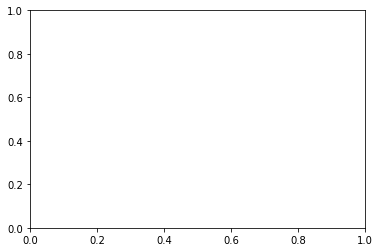

In [18]:
#mout.save('test.html')

now lets add in logos